<a href="https://colab.research.google.com/github/rajasimha5/ICP1/blob/main/ICP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
uploaded = files.upload()

Saving breastcancer.csv to breastcancer.csv


In [7]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [13]:
#Q1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load CSV dataset
data = pd.read_csv("breastcancer.csv")

# Drop unnecessary columns if present
if 'id' in data.columns:
    data = data.drop(['id'], axis=1)
if 'Unnamed: 32' in data.columns:
    data = data.drop(['Unnamed: 32'], axis=1)

# Encode target column
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Features/target
X = data.drop('diagnosis', axis=1).values
y = data['diagnosis'].values

# Normalize input
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model dynamically
def build_model(num_layers):
    model = Sequential()
    model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
    for _ in range(num_layers - 2):   # subtract input & output
        model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate models with 5, 7, 9 layers
for layers in [5, 7, 9]:
    model = build_model(layers)
    history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                        validation_data=(X_test, y_test), verbose=0)
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Model with {layers} layers → Accuracy: {acc:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model with 5 layers → Accuracy: 0.9737
Model with 7 layers → Accuracy: 0.9912
Model with 9 layers → Accuracy: 0.9649


In [14]:
#q2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load CSV dataset
data = pd.read_csv("breastcancer.csv")

# Drop unnecessary columns if present
if 'id' in data.columns:
    data = data.drop(['id'], axis=1)
if 'Unnamed: 32' in data.columns:
    data = data.drop(['Unnamed: 32'], axis=1)

# Encode target column
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Features/target
X = data.drop('diagnosis', axis=1).values
y = data['diagnosis'].values

# Normalize input
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
model = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile & train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2090 - loss: 1.1025 - val_accuracy: 0.3860 - val_loss: 0.7943
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6121 - loss: 0.6521 - val_accuracy: 0.8596 - val_loss: 0.4898
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8773 - loss: 0.4259 - val_accuracy: 0.9386 - val_loss: 0.3363
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9341 - loss: 0.2945 - val_accuracy: 0.9561 - val_loss: 0.2524
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9362 - loss: 0.2378 - val_accuracy: 0.9737 - val_loss: 0.2003
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9482 - loss: 0.1888 - val_accuracy: 0.9737 - val_loss: 0.1653
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9617 - loss: 0.1562 - val_accuracy: 0.9649 - val_loss: 0.1419
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9695 - loss: 0.1221 - val_accuracy: 0.9912 - val_loss: 0.1240


In [3]:
#Q3
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy after normalization: {acc:.4f}")


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8313 - loss: 0.6093 - val_accuracy: 0.8947 - val_loss: 0.5169
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9041 - loss: 0.5062 - val_accuracy: 0.9211 - val_loss: 0.4028
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9254 - loss: 0.4125 - val_accuracy: 0.9298 - val_loss: 0.2974
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9352 - loss: 0.3199 - val_accuracy: 0.9561 - val_loss: 0.2182
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9471 - loss: 0.2407 - val_accuracy: 0.9561 - val_loss: 0.1675
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9391 - loss: 0.2158 - val_accuracy: 0.9649 - val_loss: 0.1355
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9524 - loss: 0.1710 - val_accuracy: 0.9737 - val_loss: 0.1141
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9537 - loss: 0.1384 - val_accuracy: 0.9825 - val_loss: 0.

In [4]:
#Q4
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.keras", monitor="val_accuracy", save_best_only=True, mode="max")
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

model = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, checkpoint, reduce_lr]
)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7673 - loss: 0.5618 - val_accuracy: 0.9298 - val_loss: 0.4106 - learning_rate: 0.0010
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8696 - loss: 0.3884 - val_accuracy: 0.9649 - val_loss: 0.2923 - learning_rate: 0.0010
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9262 - loss: 0.2844 - val_accuracy: 0.9737 - val_loss: 0.2185 - learning_rate: 0.0010
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9304 - loss: 0.2323 - val_accuracy: 0.9737 - val_loss: 0.1691 - learning_rate: 0.0010
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9636 - loss: 0.1897 - val_accuracy: 0.9737 - val_loss: 0.1361 - learning_rate: 0.0010
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9694 - loss: 0.1484 - val_accuracy: 0.9649 - val_loss: 0.1150 - learning_rate: 0.0010
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9733 - loss: 0.1225 - val_accuracy:

In [ ]:
#Role of each callback:
#1)EarlyStopping: stops when there is no improvement found, saves time, prevents overfitting
#2)ModelCheckpoint: makes sure we got the best version of the model.
#3)ReduceLROnPlateau: helps model fine-tune learning when stuck in plateau.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


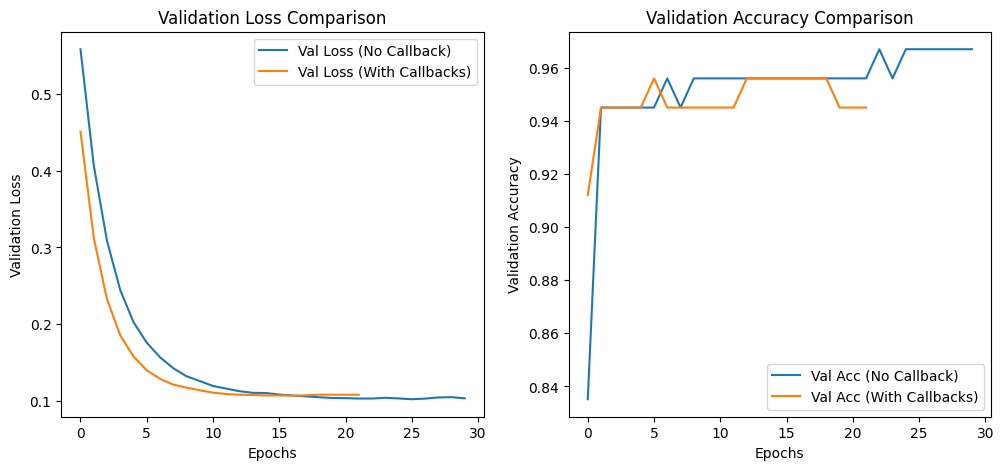

In [12]:
#q6
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# --------------------------
# Load dataset
# --------------------------
data = pd.read_csv("breastcancer.csv")

# Drop ID or unnamed column if present
if 'id' in data.columns:
    data = data.drop(['id'], axis=1)
if 'Unnamed: 32' in data.columns:
    data = data.drop(['Unnamed: 32'], axis=1)

# Encode target column
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Split features/target
X = data.drop('diagnosis', axis=1).values
y = data['diagnosis'].values

# Normalize input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------
# Build base model function
# --------------------------
def build_model():
    model = Sequential([
        Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --------------------------
# 1. Train WITHOUT callbacks
# --------------------------
model_no_cb = build_model()
history_no_cb = model_no_cb.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

# --------------------------
# 2. Train WITH callbacks
# --------------------------
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=0),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=0)
]

model_cb = build_model()
history_cb = model_cb.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=0
)

# --------------------------
# Plot comparison
# --------------------------
plt.figure(figsize=(12, 5))

# Plot Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history_no_cb.history['val_loss'], label="Val Loss (No Callback)")
plt.plot(history_cb.history['val_loss'], label="Val Loss (With Callbacks)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss Comparison")
plt.legend()

# Plot Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_cb.history['val_accuracy'], label="Val Acc (No Callback)")
plt.plot(history_cb.history['val_accuracy'], label="Val Acc (With Callbacks)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Comparison")
plt.legend()

plt.show()


In [ ]:
https://youtu.be/Hk2yW28cj0c